In [13]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Check the shapes of the loaded data
print(f"train_images shape: {train_images.shape}")
print(f"train_labels shape: {train_labels.shape}")
print(f"test_images shape: {test_images.shape}")
print(f"test_labels shape: {test_labels.shape}")

train_images shape: (60000, 28, 28)
train_labels shape: (60000,)
test_images shape: (10000, 28, 28)
test_labels shape: (10000,)


C:\Users\amurungi\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.7376 - loss: 0.6972 - val_accuracy: 0.8719 - val_loss: 0.3529
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 20ms/step - accuracy: 0.8804 - loss: 0.3242 - val_accuracy: 0.8850 - val_loss: 0.3148
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.8998 - loss: 0.2705 - val_accuracy: 0.8928 - val_loss: 0.3034
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9126 - loss: 0.2355 - val_accuracy: 0.9023 - val_loss: 0.2750
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9234 - loss: 0.2047 - val_accuracy: 0.9090 - val_loss: 0.2556
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9314 - loss: 0.1825 - val_accuracy: 0.9070 - val_loss: 0.2720
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9372 - loss: 0.1658 - val_accuracy: 0.9044 - val_loss: 0.2774
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9434 -

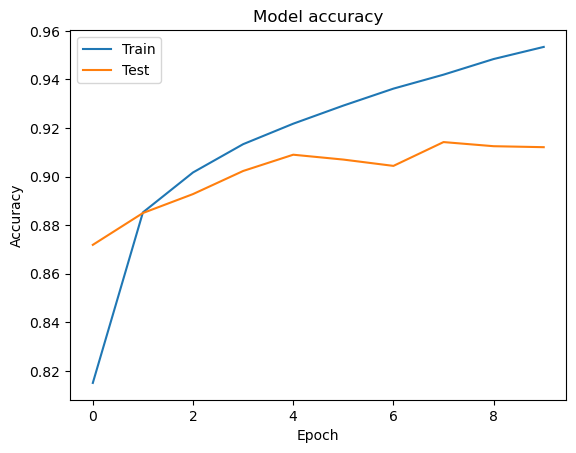

In [12]:
# Normalize the images [0,1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape the data to include the channel dimension for CNN input
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Build the CNN model with six layers
model = models.Sequential([
    #1st Conv2D + MaxPooling2D Layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    #2nd Conv2D + MaxPooling2D Layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
   
    #3rd Conv2D Layer
    layers.Conv2D(128, (3, 3), activation='relu'),
    
    #Flatten the output
    layers.Flatten(),
    
    #1st Dense Layer
    layers.Dense(128, activation='relu'),
    
    #2nd Dense Layer
    layers.Dense(64, activation='relu'),
    
    #Output Layer for the 10 classes
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [14]:
# Display some sample images with their class labels
#Specify class names to be mapped to the numeric class labels
class_names = ['T-shirt/top', 'Trouser/bottom', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']

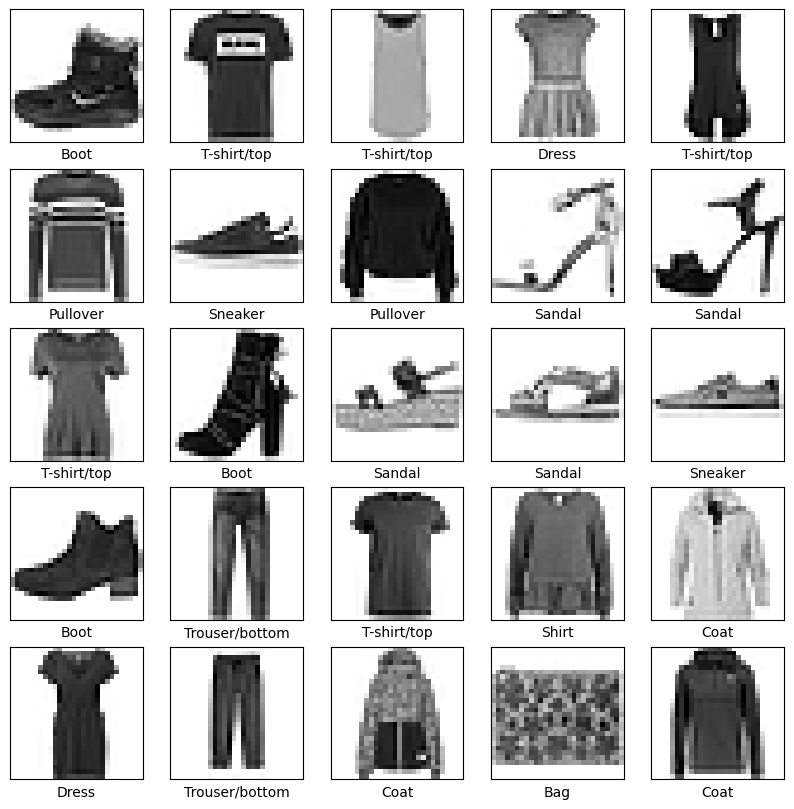

In [15]:
#Map the class names to the numeric class labels
#Plot a 5x5 grid of the first 25 images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([]) #Remove x-axis ticks
    plt.yticks([]) #Remove y-axis ticks
    plt.grid(False) #Remove gridlines
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary) #Display the images in grayscale
    plt.xlabel(class_names[train_labels[i]]) #Add the class label as x-axis label
plt.show() #Display the figure

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


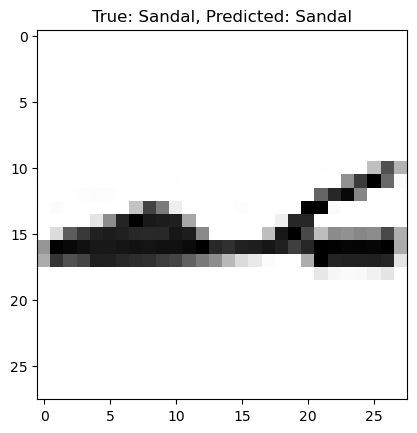

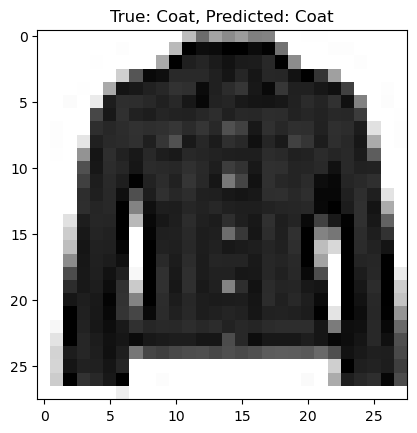

In [22]:
#Make predictions for at least two images from the dataset.

#Load numpy in addition to previously loaded modules

import numpy as np

# Select two random images from the test set
indices = np.random.choice(test_images.shape[0], 2, replace=False)
sample_images = test_images[indices]
sample_labels = test_labels[indices]

#Make predictions
predictions = model.predict(sample_images) # Make predictions for both images
predicted_classes = np.argmax(predictions, axis=1) # Get the predicted class for each image

#Display the images and predictions

for i in range(2):
    plt.imshow(sample_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f"True: {class_names[sample_labels[i]]}, Predicted: {class_names[predicted_classes[i]]}")
    plt.show()  

